# <center>Тема 7
## <center>Підготовка власного набору даних. Transfer learning

### <center>Підготовка власного набору даних

Для роботи зі згортковими нейронними мережами доводиться використовувати навчальні набори даних, які складаються з декількох тисяч зображень. Підготовка навчальних даних в такому випадку є відповідальним та затратним етапом. З метою пришвидшення цього процесу, розбиття початкового набору даних на навчальну, валідаційну та тестову множини можна автоматизувати. Розглянемо приклад, як це зробити за допомогою засобів Python.

Завдання полягає у наступному: необхідно навчити нейронну мережу розпізнавати персонажів фільмів "Зоряні війни". Початковий набір даних представлений у вигляді базового каталогу, що містить папки із зображеннями персонажів, які відносяться до різних класів. Необхідно на базі цього початкового набору сформувати навчальну, валідаційну та тестову підмножини даних. Кожна підмножина повинна складатись з основного каталогу, в якому у різних папках будуть розміщені зображення відповідних класів.

Для початку роботи, імпортуємо модулі для роботи з файловою системою.

In [1]:
import shutil
import os

Задамо значення необхідних змінних, долю валідаційної та тестової підмножини відносно початкового набору даних, а також імпортуємо імена класів. Пам'ятаємо, що папки в кожному головному каталозі повинні мати назву, яка відповідає конкретному класу, зображення якого розміщені всередині папки.

In [4]:
# Каталог з початковим набором даних
data_dir = 'C:/Drive/ІІС/Datasets/Transfer/star_wars/images'
# Каталог з даними для навчання
train_dir = 'C:/Drive/ІІС/Datasets/Transfer/star_wars/train'
# Каталог з даними для валідації
val_dir = 'C:/Drive/ІІС/Datasets/Transfer/star_wars/valid'
# Каталог з даними для тестування
test_dir = 'C:/Drive/ІІС/Datasets/Transfer/star_wars/test'

# Доля набору даних для валідації
val_data_portion = 0.15
# Доля набору даних для тестування
test_data_portion = 0.15

# Імпортуємо назви класів (як назви папок з початкового каталогу)
classes = os.listdir(data_dir)

Оголосимо функцію для створення каталогів. Дана функція створить головний каталог підмножини, а також пучті папки для кожного із класів.

In [44]:
def create_directory(dir_name):
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name)
    for name in classes:
        os.makedirs(os.path.join(dir_name, name))

Використаємо написану функцію для створення каталогів для навчальної, валідаційної та тестової підмножин.

In [45]:
create_directory(train_dir)
create_directory(val_dir)
create_directory(test_dir)

Напишемо функцію для копіювання зображень із початкового набору даних до відповідного каталогу. Функція прийматиме наступні аргументи:
- `start_indexes` - список, який містить номери зображень, починаючи з яких потрібно виконувати копіювання (для кожного класу).
- `end_indexes` - список, який містить номери зображень, якими треба завершити копіювання (для кожного класу);
- `source_dir` - адреса початкового каталогу (з якого копіювати);
- `dest_dir` - адреса каталогу призначення (до якого копіювати).

Наприклад, у деякому початковому каталозі *source* є дві папки (два класи), які містять по 100 зображень. Потрібно сформувати валідаційну підмножину, яка буде розміщена в каталозі *destination*. В якості вибірки валідації обмеремо 15 останніх зображень із початкового набору (для кожного класу). Тоді аргументами створюваної функції `copy_images()` будуть: 

`copy_images(start_indexes = [74, 74], [99,99], source, destination)`

Варто зазначити, що списки із початковими та кінцевими індексами будуть формуватись автоматично за допомогою функції, яку ми напишемо на наступному етапі.

In [78]:
def copy_images(start_indexes, end_indexes, source_dir, dest_dir):
    
    k = 0
    for name in classes:
        curr_dir = source_dir + '/' + name
        files = os.listdir(curr_dir)
                
        for i, file in enumerate(files):
            if start_indexes[k] <= i < end_indexes[k]:
                        shutil.copy2(os.path.join(curr_dir, file), 
                                     os.path.join(dest_dir, name))
        k += 1

Тепер створимо функцію для формування підмножин даних. Така функція прийматиме наступні аргуметни:

- `source_dir` - адреса початкового каталогу;
- `dest_dir` - адреса каталогу призначення
- `subset` - підмножина (навчальна, валідаційна або тестова / 'train', 'val', 'test').

Всередині функції `create_dataset()` автоматично визначаються індекси початкових та кінцевих зображень (кожного класу) для кожної підмножини, а потім викликається раніше створена функція `copy_images()` для копіювання зображені із початкового набору до відповідного каталогу вказаної підмножини.

In [102]:
def create_dataset(source_dir, dest_dir, subset):
    start_val_data_idxs = []
    start_test_data_idxs = []
    end_data_idxs = []
    
    if subset == 'train':
        for name in classes:
            nb_of_images = int(len(os.listdir(source_dir + '/' + name)))
            start_val_data_idxs.append(nb_of_images * (1 - val_data_portion - test_data_portion))
        
        copy_images([0]*len(classes), start_val_data_idxs, source_dir, dest_dir)
        
    elif subset == 'val':
        for name in classes:
            nb_of_images = int(len(os.listdir(source_dir + '/' + name)))
            start_val_data_idxs.append(int(nb_of_images * (1 - val_data_portion - test_data_portion)))
            start_test_data_idxs.append(int(nb_of_images * (1 - test_data_portion))) 
        
        copy_images(start_val_data_idxs, start_test_data_idxs, source_dir, dest_dir)
        
    elif subset == 'test':
        for name in classes:
            nb_of_images = int(len(os.listdir(source_dir + '/' + name)))
            start_test_data_idxs.append(int(nb_of_images * (1 - test_data_portion))) 
            end_data_idxs.append(nb_of_images) 
            
        copy_images(start_test_data_idxs, end_data_idxs, source_dir, dest_dir)
        
    else:
        print('subset має бути "train", "val" або "test"!')

Застосуємо функцію `create_dataset()` для створення всіх необхідних підмножин даних (навчальна, валідаційна, тестова). В результаті, будуть створені відповідні каталоги, які матимуть структуру, необхідну для подальшої роботи з нейронною мережею.

In [106]:
create_dataset(data_dir, train_dir, 'train')
create_dataset(data_dir, val_dir, 'val')
create_dataset(data_dir, test_dir, 'test')

### <center>Transfer learning

Навчання глибинних нейронних мереж може займати декілька днів і навіть тижнів. В такому випадку, у разі незадовільного результату, ціна помилки буде дуже великою. Тому що на перенавчання буде витрачено занадто багато часу. У зв'язку з цим, популярним є підхід, який назвивається *transfer learning* - перенесення навчання. Він полягає в тому, що вже колись навчена нейронна мережа з відомою архітектурою використовується для вирішення нових задач, тобто не тих, для яких вона навчалась. Це досягається завдяки наступним крокам:
1. Імпортується навчена мережа з відомою архітектурою.
2. З мережі видаляються останні прошарки, які відповадають за класифікацію (так звана "вершина" (top, head) мережі).
3. Замість видалених прошарків створюються нові. Архітектура цих нових прошарків має відповідати новій задачі, яку повинна буде вирішувати нейронна мережа.

Чому це працює? Справа в тому, що навчена нейронна мережа вже вміє якісно виділяти значущі ознаки із зображення. Тобто немає сенсу знову навчати її знаходити аналоги ознак Хаара - мережа і так вміє це робити, оскільки всі значення синаптичних ваг згорткових прошарків були встановлені під час попереднього навчання. Єдине, що залишається, це навчити мережу правильно класифікувати об'єкти за тим набором ознак, які вона виділить із зображення. Таким чином, у разі використання *transfer learning* навчається лише та частина мережі, яка відповідає за класифікацію. Це дозволяє значно пришвидшити навчання, а також покращити його якість (оскільки показники ефективності роботи мережі відомі заздалегідь).

Застосуємо підхід *transfer learning* для навчання нейронної мережі для класифікації персонажів фільмів "Зоряні війни". В якості попередньо навченої мережі імпортуємо мережу VGG16 з набором синаптичних ваг, отриманих в результаті навчання на наборі даних *ImageNet*. Цей набір містить 1000 різних класів об'єктів, і мережа VGG16 вже вміє проводити їх класифікацію з високою достовірністю. Але в даній задачі ми будемо застосовувати мережу VGG16 для класифікації всього лише 8 типів об'єктів. Більше того, дані об'єкти не зустрічались мережі під час попереднього навчання. Тому прошарки мережі, які відповідають за класифікацію, потрібно буде відкинути, і замість них створити та навчити свої власні.

Для початку, імпортуємо необхідні модулі (серед яких і сама мережа VGG16).

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image

from tensorflow.keras.applications import VGG16

import matplotlib.pyplot as plt

Задамо оптимальні параметри роботи відеокарти.

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
session = InteractiveSession(config=config)

physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Вкажемо початкові налаштування.

In [2]:
# Каталог з даними для навчання
train_dir = 'C:/Drive/ІІС/Datasets/Transfer/star_wars/train'
# Каталог з даними для валідації
val_dir = 'C:/Drive/ІІС/Datasets/Transfer/star_wars/valid'
# Каталог з даними для тестування
test_dir = 'C:/Drive/ІІС/Datasets/Transfer/star_wars/test'

# Назви класів
classes = os.listdir(train_dir)

# Розміри зображення
img_width, img_height = 150, 150
# Розмірність тензора вхідного зображення для входу нейронної мережі
input_shape = (img_width, img_height, 3)
# Розмір батчу
batch_size = 32

Створимо об'єкт мережі VGG16 з наступними параметрами:
- `weights='imagenet'` - набір попередьно навчених ваг: ImageNet
- `include_top=False` - не завантажувати частину мережі, призначену для класифікації
- `input_shape=input_shape` - форма вхідного зображення (в нашому випадку - (150, 150, 3)).

In [3]:
vgg16_net = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

Заборонимо навчання всіх завантажених прошарків мережі VGG16, встановивши значення атрибуту `vgg16_net.trainable = False`. Після цього переглянемо зведену інформацію щодо мережі і переконаємось, що кількість внутрішніх параметрів, доступних для навчання, дорівнює нулю (*Trainable params: 0*).

In [4]:
vgg16_net.trainable = False
vgg16_net.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Створюємо власну нейронну мережу, яка буде складатись з завантаженої частини навченої VGG16 та власного класифікатора.

In [5]:
model = Sequential()
# Додаємо до моделі мережу VGG16 замість прошарку
model.add(vgg16_net)

# Додаємо до моделі власний класифікатор
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(classes), activation='softmax'))

Переглянемо інформацію про створену мережу. Як можна побачити, під час навчання доведеться знайти значення лише 2,098,693 параметрів, тоді як загалом наша модель містить 16,813,381 внутрішніх параметрів. Але з них 14,714,688 параметрів вже були попередньо навчені, їх не потрібно модифіковувати (що ми і заборонили робити на попередніх етапах). Це значно пришвидшить процес навчання.

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 16,813,381
Trainable params: 2,098,693
Non-trainable params: 14,714,688
_________________________________________________________________


Компілюємо модель. Оскільки додана частина мережі VGG16 вже була попередньо навчена і вміє гарно виявляти ознаки, необхідно знизити швидкість навчання `learning_rate`. Це зроблено для того, щоб оптимізатор не пропустив мінімум функції втрат.

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=1e-5), 
              metrics=['accuracy'])

Створюємо об'єкт-генератор зображень `ImageDataGenerator()` для автоматичної стандартизації значень пікселів під час імпорту картинки з каталогу.

In [8]:
datagen = ImageDataGenerator(rescale=1. / 255)

Створюємо та налаштовуємо генератори для навчальної, валідаційної та тестової підмножин.

In [9]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 892 images belonging to 5 classes.


In [10]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 189 images belonging to 5 classes.


In [11]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 192 images belonging to 5 classes.


Запам'ятовуємо кількість зображень у навчальній та валідаційній мережі (знадоибться для коректного визначення кількості крок за епоху навчання).

In [12]:
nb_train_samples = 892
nb_validation_samples = 189

Навчаємо модель.

In [13]:
history = model.fit(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=15,
            validation_data=val_generator,
            validation_steps=nb_validation_samples // batch_size)

Epoch 1/15
18/27 [===================>..........] - ETA: 3s - loss: 1.7066 - accuracy: 0.2395

C:\Users\drewmt\anaconda3\envs\PythonGPU\lib\site-packages\PIL\Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


27/27 [==============================] - 14s 516ms/step - loss: 1.6738 - accuracy: 0.2616 - val_loss: 1.4439 - val_accuracy: 0.4187
Epoch 2/15
27/27 [==============================] - 4s 136ms/step - loss: 1.4253 - accuracy: 0.4151 - val_loss: 1.2821 - val_accuracy: 0.5938
Epoch 3/15
27/27 [==============================] - 4s 136ms/step - loss: 1.2727 - accuracy: 0.5093 - val_loss: 1.1702 - val_accuracy: 0.6625
Epoch 4/15
27/27 [==============================] - 4s 151ms/step - loss: 1.1264 - accuracy: 0.6314 - val_loss: 1.0491 - val_accuracy: 0.7250
Epoch 5/15
27/27 [==============================] - 4s 136ms/step - loss: 1.0187 - accuracy: 0.6895 - val_loss: 0.9481 - val_accuracy: 0.7500
Epoch 6/15
27/27 [==============================] - 4s 141ms/step - loss: 0.9042 - accuracy: 0.7350 - val_loss: 0.8905 - val_accuracy: 0.7812
Epoch 7/15
27/27 [==============================] - 4s 137ms/step - loss: 0.8382 - accuracy: 0.7721 - val_loss: 0.8167 - val_accuracy: 0.7937
Epoch 8/15
27/27

Перевіряємо модель на тестових даних.

In [14]:
scores = model.evaluate(test_generator)
print(f"Accuracy на тестових даних: {(scores[1]*100):.2f}")

6/6 [==============================] - 2s 368ms/step - loss: 0.6725 - accuracy: 0.7812
Accuracy на тестових даних: 78.12


Отже, завдяки застосуванню підходу *transfer learning*, нам вдалось навчити нейронну мережу вирішувати нову задачу з високою ефективністю всього лише за 10-15 епох навчання. Але навіть цей результат не є найкращим. Для його покращення можна застосувати додатковий підхід, який має назву *fine tuning*.

### <center>Тонкі налаштування мережі (fine tuning)

Під час використання *transfer learning* виокристовується попередньо навчена нейронна мережа, в якій замінено прошарки, що відповідають за класифікацію. Прошарки для виділення ознак на зображеннях залишаються і "заморожуються" під час навчання. Тобто синаптичні ваги цих прошарків не змінюються, оскільки вони не доступні для навчання. Однак, якщо нове завдання значно відрязняється від того, на якому була попередьно навчена нейронна мережа, деякі з останніх прошарків для виділення ознак можна активувати для навчання. Чим сильніша різниця між попередньою та новою задачею, тим більше останнії прошарків для виділення ознак рекомендується зробити доступними для навчання. Такий піхдхід називається тонким налаштуванням мережі, або *fine tuning*.

Застосуємо *fine tuning* для покращення якості мережі, отриманої у попередньому прикладі. Для цього дозволимо навчання останнього згорткового прошарку мережі VGG16, який називається *'block5_conv3'*. Навчання всіх інших прошарків залишаємо забороненим.

In [15]:
# Активуємо для навчання всю мережу
vgg16_net.trainable = True
# Перебираємо в циклі прошарки та вимикаємо навчання для всіх прошарків, окрім потрібного
trainable = False
for layer in vgg16_net.layers:
    if layer.name == 'block5_conv3':
        trainable = True
    layer.trainable = trainable

Перевіряємо кількість параметрів, доступних для навчання. Бачимо, що у порівнянні з попереднім варіантом, їх кількість збільшилась, оскільки прошарок *'block5_conv3'* тепер доступний для навчання.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 16,813,381
Trainable params: 4,458,501
Non-trainable params: 12,354,880
_________________________________________________________________


Заново компілюємо модифіковану модель.

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

Навчаємо модифіковану модель.

In [18]:
history = model.fit(
            train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=15,
            validation_data=val_generator,
            validation_steps=nb_validation_samples // batch_size)

Epoch 1/15
27/27 [==============================] - 4s 151ms/step - loss: 0.4377 - accuracy: 0.8837 - val_loss: 0.5352 - val_accuracy: 0.8375
Epoch 2/15
27/27 [==============================] - 4s 139ms/step - loss: 0.3370 - accuracy: 0.9244 - val_loss: 0.4848 - val_accuracy: 0.8562
Epoch 3/15
27/27 [==============================] - 4s 141ms/step - loss: 0.2874 - accuracy: 0.9384 - val_loss: 0.4906 - val_accuracy: 0.8250
Epoch 4/15
27/27 [==============================] - 4s 139ms/step - loss: 0.2380 - accuracy: 0.9535 - val_loss: 0.4112 - val_accuracy: 0.8687
Epoch 5/15
27/27 [==============================] - 4s 140ms/step - loss: 0.2033 - accuracy: 0.9640 - val_loss: 0.4286 - val_accuracy: 0.8375
Epoch 6/15
27/27 [==============================] - 4s 140ms/step - loss: 0.1695 - accuracy: 0.9699 - val_loss: 0.4331 - val_accuracy: 0.8375
Epoch 7/15
27/27 [==============================] - 4s 142ms/step - loss: 0.1482 - accuracy: 0.9767 - val_loss: 0.4432 - val_accuracy: 0.8188
Epoch 

Перевіряємо якість мережі на тестовій підмножині.

In [20]:
scores = model.evaluate(test_generator)
print(f"Accuracy на тестових даних: {(scores[1]*100):.2f}")

6/6 [==============================] - 1s 100ms/step - loss: 0.4672 - accuracy: 0.8594
Accuracy на тестових даних: 85.94


Як видно з результатів, використання *fine tuning* дозволило покращити якість роботи мережі на тестових даних майже на 9% у порівнянні з попереднім варіантом, коли навчався лише класифікатор. Аналогічним чином можна розблокувати для навчання і інші частини (прошарки) початкової мережі, до якої застосовується *transfer learning*. Кількість доступних для навчання прошарків залежить від конкретних задач.

Використаємо навчену нейронну мережу для розпізнавання зображення, яке імпортується з жорсткого диску ПК.

In [25]:
from IPython.display import Image
from tkinter.filedialog import askopenfilename

(-0.5, 149.5, 149.5, -0.5)

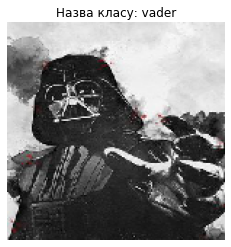

In [24]:
img_path = askopenfilename()

img = image.load_img(img_path, target_size=(img_width, img_height))

x = image.img_to_array(img)
x = x.reshape(-1, img_width, img_height, 3)

prediction = model.predict(x)
prediction = np.argmax(prediction)

plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title(f"Назва класу: {classes[prediction]}" )
plt.axis("off")